# TP4 - kPCA

TD : trouver les formules du cours à partir de la formulatiyoACP kernelisée

## Preliminaries

This section builds up some preliminary analysis to get some unerstanding on how PCA works.
Let us consider the following data blob:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 100

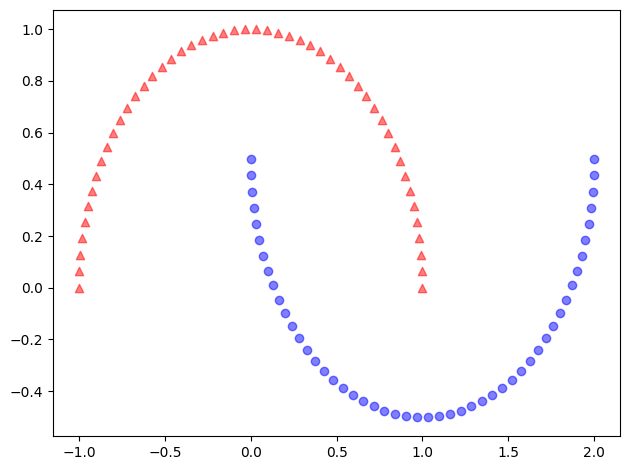

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=n_samples, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

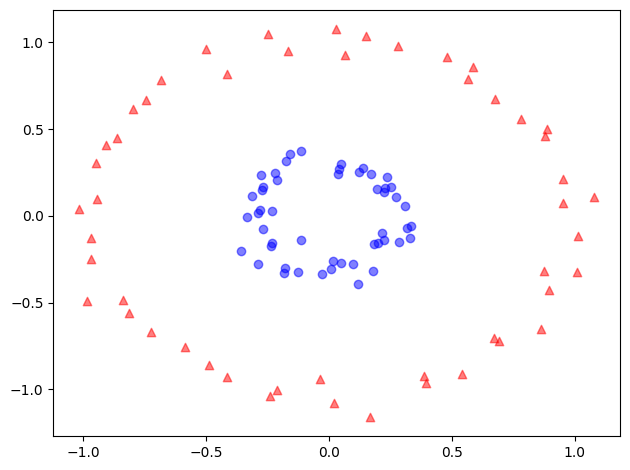

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=n_samples, factor=0.3, noise=0.05, random_state=0)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()


## kPCA - algorithm


In [86]:
from sklearn.metrics.pairwise import rbf_kernel

class My_kernel_PCA():

    def __init__(self, n_components, kernel='rbf'):
        self.n_components = n_components
        self.kernel = kernel

    def fit_transform(self, X):
        K = rbf_kernel(X)
        N = K.shape[0]
        one_n = np.ones((N, N)) / N
        K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
        _, eigvecs = np.linalg.eigh(K)
        
        new_Y = np.zeros((X.shape[0], self.n_components))
        for i in range(X.shape[0]):
            for j in range(self.n_components):
                for k in range(X.shape[0]):
                    new_Y[i][j] += eigvecs[k][-j]*K[i][k]
        return new_Y
    
    
    def S(self, X):
        K = rbf_kernel(X)
        N = K.shape[0]
        one_n = np.ones((N, N)) / N
        K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
        eigval, eigvecs = np.linalg.eigh(K)
        return eigval
        
    


In [87]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics.pairwise import rbf_kernel

Kernel = rbf_kernel(X)
print(Kernel)
print(Kernel.shape)
kernel= "poly"  # ‘rbf’, ‘sigmoid’, ‘polynomial’, ‘poly’, ‘linear’, ‘cosine’

my_manifold_learning = My_kernel_PCA(n_components=2, kernel=kernel)

# Fix: Ensure arrays are in a list or tuple format
data_transformed = my_manifold_learning.fit_transform(X=X)

print(data_transformed)
print(data_transformed.shape)

[[1.         0.629512   0.57143032 ... 0.85051614 0.53781919 0.64812139]
 [0.629512   1.         0.75453724 ... 0.39185645 0.43153783 0.96782389]
 [0.57143032 0.75453724 1.         ... 0.2696805  0.81988895 0.61778954]
 ...
 [0.85051614 0.39185645 0.2696805  ... 1.         0.25381808 0.46248392]
 [0.53781919 0.43153783 0.81988895 ... 0.25381808 1.         0.33419754]
 [0.64812139 0.96782389 0.61778954 ... 0.46248392 0.33419754 1.        ]]
(100, 100)
[[ 2.60132627e-15 -8.62037750e-01]
 [ 2.06085149e-15 -1.83670998e+00]
 [ 6.34908792e-16 -3.25630400e+00]
 [ 1.55431223e-15  2.98034042e+00]
 [ 1.59594560e-15 -3.12570955e-01]
 [ 8.15320034e-16 -2.20679662e+00]
 [ 1.03476255e-15 -1.48574080e+00]
 [ 1.24423041e-15  2.20679662e+00]
 [ 1.10154941e-15 -3.20615001e+00]
 [-1.12757026e-16 -1.66675922e+00]
 [ 1.25247035e-15  2.35420506e+00]
 [-2.15105711e-16 -7.80630052e-01]
 [ 2.39391840e-16 -2.76687269e+00]
 [ 2.12330153e-15  4.01324530e-01]
 [ 1.80411242e-15  2.50383757e+00]
 [ 5.10008702e-16  3

In [76]:
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
print(kernel)

1**2 * RBF(length_scale=1)


In [89]:
print(my_manifold_learning.S)


<bound method My_kernel_PCA.S of <__main__.My_kernel_PCA object at 0x0000022775F37BC0>>


In [77]:
print (data_transformed.shape)
data_transformed[:10]

(100, 2)


array([[ 2.60132627e-15, -8.62037750e-01],
       [ 2.06085149e-15, -1.83670998e+00],
       [ 6.34908792e-16, -3.25630400e+00],
       [ 1.55431223e-15,  2.98034042e+00],
       [ 1.59594560e-15, -3.12570955e-01],
       [ 8.15320034e-16, -2.20679662e+00],
       [ 1.03476255e-15, -1.48574080e+00],
       [ 1.24423041e-15,  2.20679662e+00],
       [ 1.10154941e-15, -3.20615001e+00],
       [-1.12757026e-16, -1.66675922e+00]])

In [78]:
X[:10]

array([[ 0.8713187 ,  0.49071755],
       [ 0.71547241, -0.45866785],
       [ 1.46253829, -0.38659931],
       [-0.22252093,  0.97492791],
       [ 0.32769911, -0.240278  ],
       [ 1.        ,  0.        ],
       [ 0.94905575,  0.31510822],
       [ 0.        ,  0.5       ],
       [ 1.40478334, -0.41441262],
       [ 0.96729486,  0.25365458]])

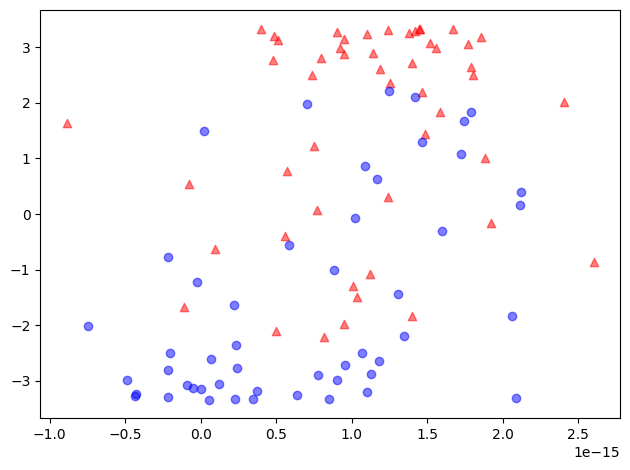

In [90]:
plt.scatter(data_transformed[y==0, 0], data_transformed[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(data_transformed[y==1, 0], data_transformed[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

# test

In [91]:
from scipy.spatial.distance import pdist, squareform
from scipy import *
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = np.exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)])
    return X_pc


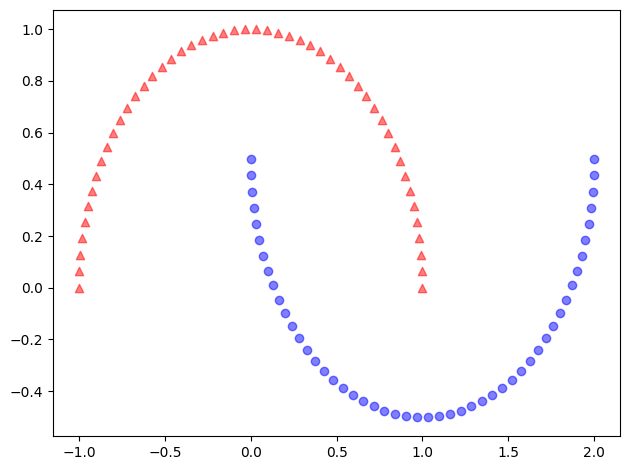

In [92]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

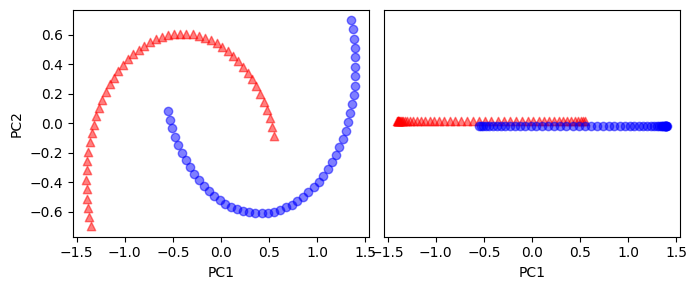

In [93]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

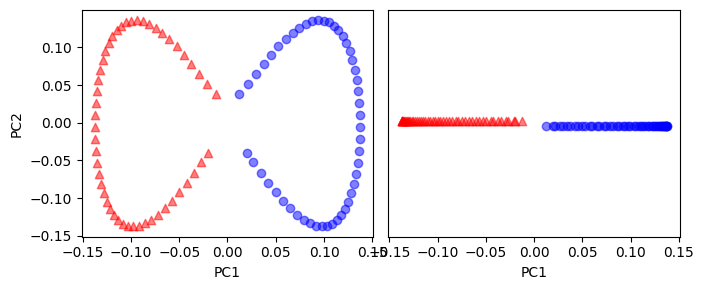

In [94]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()



# Comparaison avec sklearn kPCA

In [20]:
from sklearn.decomposition import PCA, KernelPCA

kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=5, fit_inverse_transform=True, alpha=0.1)
X_kernel_pca = kernel_pca.fit(X).transform(X)

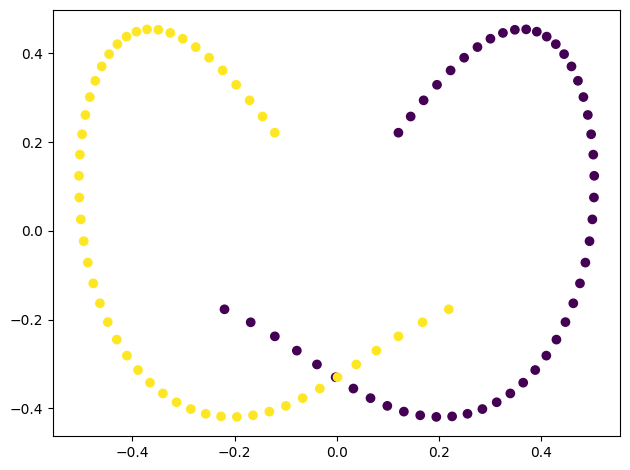

In [95]:
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c= y)
plt.tight_layout()
plt.show()